# Quickstart

If you have a working version of Python 2 or 3 on your system
(we recommend [Anaconda Python](https://www.continuum.io/downloads)),
you can simply install the latest stable release of the *lightkurve* package using ``pip``:
```
$ pip install lightkurve
```
With *lightkurve* installed, it is easy to extract brightness time series data (astronomers call this a *lightcurve*)
from the tiny images of stars collected by the Kepler spacecraft.

For example, let's download and display the pixels of a famous star named [KIC 8462852](https://en.wikipedia.org/wiki/KIC_8462852), also known as *Tabby's Star* or *Boyajian's Star*.

First, we start Python and import the `KeplerTargetPixelFile` class:

In [1]:
from lightkurve import KeplerTargetPixelFile

Next, we obtain the Kepler pixel data for the star from the [data archive](https://archive.stsci.edu/kepler/):

In [2]:
tpf = KeplerTargetPixelFile.from_archive(8462852, quarter=16,
                                         quality_bitmask='hardest');

INFO: Found cached file ./mastDownload/Kepler/kplr008462852_lc_Q111111111111111111/kplr008462852-2013098041711_lpd-targ.fits.gz with expected size 7026906. [astroquery.query]


Next, let's display the first image in this data set:

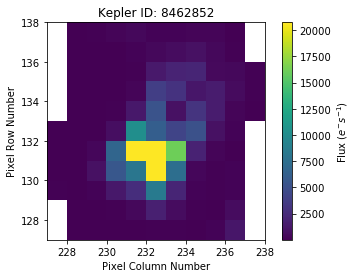

In [3]:
%matplotlib inline
tpf.plot(frame=1);

It looks like the star is an isolated object, so we can extract a lightcurve by simply summing up all the pixel values in each image:

In [4]:
lc = tpf.to_lightcurve(aperture_mask='all');

The above method returned a `KeplerLightCurve` object which gives us access to the flux over time, which are both available as array objects.  The time is in units of *days* and the flux is in units *electrons/second*.

In [5]:
lc.time, lc.flux

(array([ 1472.11777934,  1472.13821223,  1472.15864492, ...,  1557.89718798,
         1557.9380561 ,  1557.95849016]),
 array([ 258645.03125 ,  258660.046875,  258690.078125, ...,  258929.859375,
         258884.65625 ,  258865.59375 ], dtype=float32))

We can plot these data using the `plot()` method:

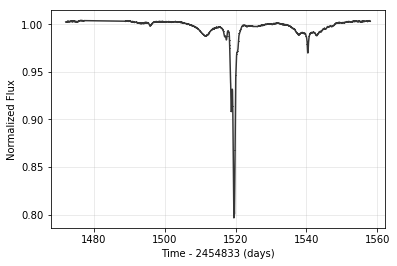

In [6]:
lc.plot(linestyle='solid');

The plot reveals a short-lived 20% dip in the brightness of the star.  It looks like we re-discovered one of the [intriguing dips in Tabby's star](https://en.wikipedia.org/wiki/KIC_8462852#Luminosity)!

## KeplerTargetPixelFile loading data from local file

Another way to process TPFs is using `KeplerTargetPixelFile` function and pass as first argument the path file to our **local Kepler Target Pixel File** in our computer.

Additionally we can download the Target Pixel Files from the web site [MAST data archive](https://archive.stsci.edu/kepler/)
* click over **Download Options**
* click over over the **link** under the title **Target Pixel Files**

In [5]:
from lightkurve import KeplerTargetPixelFile

path_file = 'kepler-target-pixel-files/kplr001429092-2009166043257_lpd-targ.fits.gz'
tpf_local_file = KeplerTargetPixelFile(path_file, quarter=16, quality_bitmask='hardest')

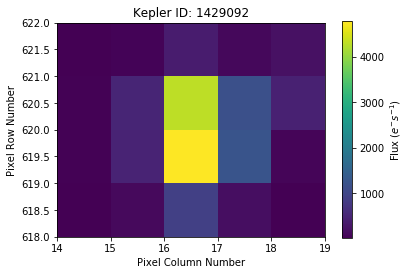

In [6]:
%matplotlib inline
tpf_local_file.plot(frame=1);